In [1]:
import pandas as pd 
import numpy as np
from functools import lru_cache
import os
from tqdm import tqdm

In [2]:
sasrec_session_candidates_path = '/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/candidates/SASRec_Next/kdd_cup_2023/2023-04-01-14-13-51.parquet'
co_graph_item_candidates_path = '/root/autodl-tmp/huangxu/Amazon-KDDCUP-23/co-occurrence_graph/item_candidates.ftr'
retromae_session_candidates_path = '/root/autodl-tmp/xiaolong/WorkSpace/Amazon-KDDCUP-23/candidates/retromae_UK_valid_prediction.parquet'
valid_inter_feat_path = '../data_for_recstudio/all_task_1_valid_inter_feat.csv'
valid_sessions_path = '../data_for_recstudio/all_task_1_valid_sessions.csv'
product_data_path = '../raw_data/products_train.csv'

In [3]:
@lru_cache(maxsize=1)
def read_valid_sessions():
    return pd.read_csv(valid_sessions_path)

@lru_cache(maxsize=1)
def read_sasrec_session_candidates():
    return pd.read_parquet(sasrec_session_candidates_path, engine='pyarrow')

@lru_cache(maxsize=1)
def read_retromae_session_candidates():
    return pd.read_parquet(retromae_session_candidates_path, engine='pyarrow')

@lru_cache(maxsize=1)
def read_co_graph_item_candidates():
    return pd.read_feather(co_graph_item_candidates_path)

@lru_cache(maxsize=1)
def read_product_data():
    return pd.read_csv(product_data_path)

In [4]:
valid_sessions = read_valid_sessions()
len(valid_sessions)

361581

In [6]:
sasrec_predictions = read_sasrec_session_candidates()
len(sasrec_predictions)

361581

In [14]:
import copy 
sasrec_predictions_100 = copy.deepcopy(sasrec_predictions)
sasrec_predictions_100['candidates'] = sasrec_predictions.apply(lambda x : x['candidates'][:100], axis=1)
len(sasrec_predictions_100.iloc[0]['candidates'])

100

In [18]:
from collections import Counter
rank_counter = Counter()

In [19]:
valid_sessions.iloc[0]

prev_items    ['B09VSN9GLS' 'B09VSG9DCG' 'B0BJ5L1ZPH' 'B09VS...
next_item                                            B06XG1LZ6Z
locale                                                       UK
Name: 0, dtype: object

In [20]:
for i in tqdm(range(len(valid_sessions))):
    ground_truth = valid_sessions.iloc[i]['next_item']
    predictions = sasrec_predictions_100.iloc[i]['candidates']
    rank = 150
    for j, x in enumerate(predictions):
        if x == ground_truth:
            rank = j + 1
            break
    rank_counter[rank] += 1

100%|██████████| 361581/361581 [00:25<00:00, 14055.48it/s]


In [30]:
import matplotlib.pyplot as plt
import numpy as np
x = list(range(1, 101))
y = [rank_counter[i]  for i in x]
x.append(150), y.append(rank_counter[150])
x = np.array(x)
y = np.array(y)
x, y

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 150]),
 array([ 74329,  23095,  13193,   9344,   7211,   5823,   4974,   4165,
          3701,   3316,   2894,   2651,   2380,   2197,   2049,   1905,
          1795,   1686,   1604,   1494,   1368,   1317,   1282,   1191,
          1082,   1086,   1060,    969,    916,    903,    897,    835,
           775,    786,    741,    733,    712,    623,    667,    626,
           590,    605,    525,    536,    568,    574,    480,    49

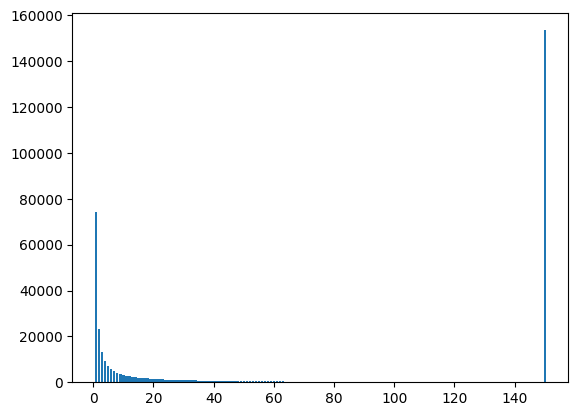

In [31]:
plt.bar(x,y)
plt.show()

In [33]:
y2 = np.array(y) / len(sasrec_predictions)

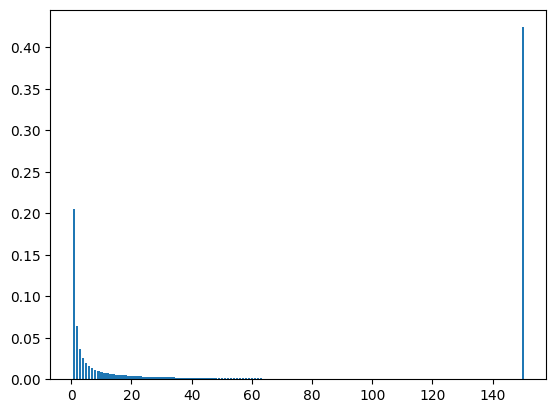

In [34]:
plt.bar(x, y2)
plt.show()

In [ ]:
for i in range(0, 100):
    rank = i 
    num